In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from scipy import stats

## The data
You can find a link to variable explanations [here](https://www.openintro.org/stat/data/?data=ames).

In [23]:
# load data into dataframe
ames = pd.read_csv("https://www.openintro.org/stat/data/ames.csv")
# remove special characters from variable names
ames.columns = [c.replace(".","") for c in ames.columns]

In [8]:
ames.columns

Index(['Order', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'X1stFlrSF', 'X2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond',

In [13]:
ames.OverallCond.describe()

count    2930.000000
mean        5.563140
std         1.111537
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

In [4]:
ames.shape

(2930, 82)

In [28]:
ames = ames.sample(290, random_state=111)

In [50]:
train, test = train_test_split(ames, random_state=111)
k = 100

Do not touch that test set until after you have chosen your model. Make sure to use the same training set throughout this exercise. After you have run the k-fold validation to select a model, you can use the test set to estimate error in unseen data.

# Sample Model

In [38]:
X_samp = train[["OverallCond", "YearBuilt"]]
y_samp = train["SalePrice"]

### Warm-up Exercise: 
Prove to yourself that each observation appears in a k_test set exactly once.

In [60]:
X_samp.shape

(217, 2)

In [51]:
model_samp = LinearRegression(normalize=True)
k_rmse = [] # this way we can see what the error is for each test fold
for k_train_idx, k_test_idx in KFold(k).split(X_samp):
    model_samp.fit(X_samp.iloc[k_train_idx], y_samp.iloc[k_train_idx])
    k_rmse.append(np.sqrt(mean_squared_error(y_samp.iloc[k_test_idx], model_samp.predict(X_samp.iloc[k_test_idx]))))

### CV error

In [52]:
print(np.mean(k_rmse), stats.sem(k_rmse))

47578.6706339 2907.53802886


(array([ 39.,  25.,  17.,   4.,   5.,   3.,   1.,   1.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.]),
 array([  9.90675662e+07,   1.29925070e+09,   2.49943384e+09,
          3.69961698e+09,   4.89980011e+09,   6.09998325e+09,
          7.30016639e+09,   8.50034952e+09,   9.70053266e+09,
          1.09007158e+10,   1.21008989e+10,   1.33010821e+10,
          1.45012652e+10,   1.57014483e+10,   1.69016315e+10,
          1.81018146e+10,   1.93019978e+10,   2.05021809e+10,
          2.17023640e+10,   2.29025472e+10,   2.41027303e+10,
          2.53029134e+10,   2.65030966e+10,   2.77032797e+10,
          2.89034628e+10,   3.01036460e+10]),
 <a list of 25 Patch objects>)

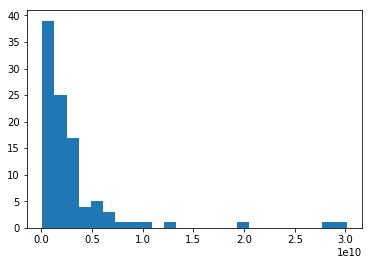

In [59]:
plt.hist(np.power(k_rmse,2), bins=25)

# Exercise
Work with your neighbors to agree on a few models to try. Each of you run the k-fold cross validation on every model you agree to. Compare your CV scores for each model, as well as the final model selection and error on the test set.